## Q&A Activity on Testing of Hypothesis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import math
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

##### Reading the dataset into Python

In [2]:
dataset=pd.read_csv('Week_8_Q&A_dataset - Sheet1.csv')

In [3]:
dataset

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21
5,female,completed,40
6,male,none,30
7,female,none,12
8,male,none,18
9,male,none,24


In [4]:
dataset.isnull().sum()

Gender              0
Test preparation    0
Total Marks         0
dtype: int64

## 1. Carry out descriptive analytics on the dataset.


In [5]:
dataset.describe()

,Total Marks
count,28.000000
mean,32.321429
std,12.454520
min,12.000000
25%,22.500000
50%,33.000000
75%,43.250000
max,50.000000


#### Insights:
The descripive analytics is one of the most important steps for conducting a statistical data analysis that describes a set of data.
From the observation, we have obtained the mean,standard deviation,minimum-maximum,frequency and the percentiles of the sample data giiven are some of the descriptive statistics used in hypothesis testing.


In [6]:
dataset['Test preparation'].describe()

count       28
unique       2
top       none
freq        21
Name: Test preparation, dtype: object

In [7]:
dataset['Gender'].count()

28

In [8]:
dataset["Gender"].value_counts()

female    16
male      12
Name: Gender, dtype: int64

In [9]:
dataset.head()

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21


In [10]:
dataset.groupby("Gender").std()


,Total Marks
Gender,
female,12.865976
male,12.168950


## 2. Check whether female and male students scored the same marks.

In [11]:
dataset.groupby("Gender").mean()


,Total Marks
Gender,
female,33.750000
male,30.416667


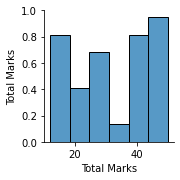

In [13]:
sns.pairplot(dataset)

In [14]:
female= dataset[dataset.Gender== 'female']["Total Marks"]
male= dataset[dataset.Gender=='male']["Total Marks"]

In [15]:
female.describe()

count    16.000000
mean     33.750000
std      12.865976
min      12.000000
25%      25.500000
50%      39.000000
75%      43.500000
max      50.000000
Name: Total Marks, dtype: float64

In [16]:
male.describe()

count    12.000000
mean     30.416667
std      12.168950
min      14.000000
25%      21.750000
50%      29.000000
75%      43.250000
max      47.000000
Name: Total Marks, dtype: float64

### Testing the hypothesis:
      Null Hypothesis, H(0) = The average marks of female and male students are equal or the same. (Mean1 = Mean2)
      
      Alternate Hypothesis, H(a) = The average marks scored by the females and males are not same, i.e they are different. (Mean1  not equal to Mean2)

#### We need to analyze the difference between the means of two independent variables.

#### 2 - tailed sample T - Test :

##### A 2- tailed T - Test is a method in which the critical area of a distribution is 2 sided which is used in null hypothesis testing and testing for statsistical significance.

In [17]:
from scipy.stats import ttest_ind

In [18]:
ttest_ind(a=female,b=male,equal_var=True)

Ttest_indResult(statistic=0.6940885268848668, pvalue=0.4937822317960763)

### Insights:
    From the observation, it is clear that the pvalue, the probability that results from our sample size(pvalue=0.4938) obtained i.e a pvalue of 0.05(5%) is accepted to mean that the data is valid and and since the pvalue lies in the critical region we reject the null hypothesis and failed to reject the alternate hypothesis.
    As we failed to reject the Alternate hypothesis H(a) in the test, therefore we can say that the average marks of females and males are not the same.

### 3. Whether test preparation helps the students?

In [19]:
dataset.groupby("Test preparation").mean()

,Total Marks
Test preparation,
completed,44.571429
none,28.238095


In [20]:
completedtest= dataset[dataset['Test preparation']== 'completed']["Total Marks"]
notcompleted= dataset[dataset['Test preparation']=='none']["Total Marks"]

In [21]:
completedtest.describe()

count     7.000000
mean     44.571429
std       3.359422
min      40.000000
25%      43.000000
50%      44.000000
75%      46.000000
max      50.000000
Name: Total Marks, dtype: float64

In [22]:
notcompleted.describe()

count    21.000000
mean     28.238095
std      11.661495
min      12.000000
25%      18.000000
50%      27.000000
75%      38.000000
max      48.000000
Name: Total Marks, dtype: float64

### Testing the hypothesis:
        Null Hypothesis H(0) = The average marks of the students completed the test is less than or equal to that of not completed students.(Mean1 <= Mean2)
        Alternative Hypothesis H(a)= The average marks of the students those who have completed the test is higher than that of the students who have not completed the test. (Mean1 > Mean2)

#### One - tailed T - Test

##### - A one -tailed T - Test is a statistical test in which the critical area of a distribution is one -sided so that it is either greater than or less than a certain value, but not both. It is known as a directional hypothesis test.

In [23]:
ttest_ind(a=completedtest,b=notcompleted,equal_var=True)

Ttest_indResult(statistic=3.6143637527769217, pvalue=0.0012671292457320106)

#### Insights:
       From the observation obtained, we have obtained a pvalue 0f 0.00127. 
       Since a lower pvalue, we reject the Null Hypothesis and failed to reject the Alternate Hypothesis H(a).
       Therefore, we can say that the average marks of the students those who have completed the test is higher than that of the students those who have not completed. 
       The test preparation actually helped the students to score good marks.